# Objectives

1. Recap on **Bayes Rule**
2. **Prior**, **Conditional** and **Posterior** probabilities
3. **Multinomial Naive Bayes** method for classification (**example 1:** email spam filter)
4. Multinomial NB in python (**example 2:** lyrics classification)


# Warm-up

**Work in groups of three to answer the following questions:**

**Assume there are 25 million programmers in the world**

**Estimate the probability that a random person is a programmer, if:**

1. you know nothing about them

2. you know they are attending primary school

3. you know they are living in Berlin

4. you know they are at SPICED Academy

## 1. Recap on Bayes Rule 

**General Bayes Rule**

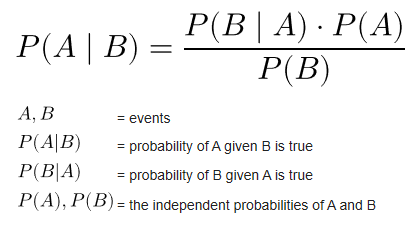

## 2. Prior, Conditional and Posterior probabilities

**Bayes Rule for Classification**

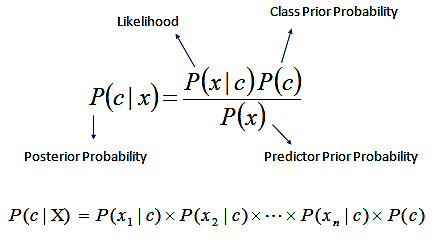

## 3. Multinomial Naive Bayes method for classification

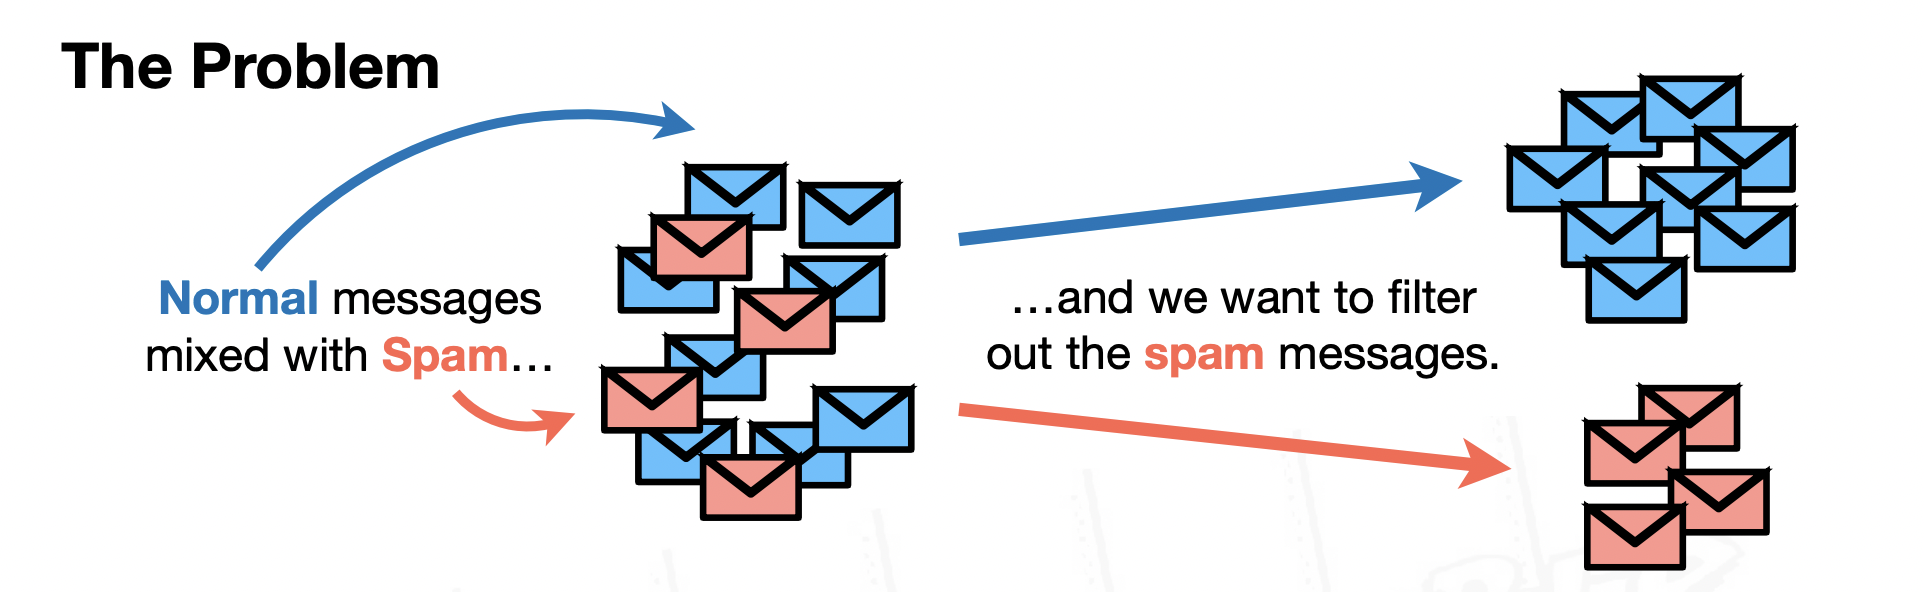

**Let's consider the spam filter we all have in our email**

**to decide if an email consisting of the phrase 'Dear Friend' is normal or spam, we need to calculate the following:**

1. $p(normal|Dear Friend) \propto p(Dear Friend|normal)\times p(normal) = p(Dear|normal)\times p(Friend|normal)\times  p(normal) = 0.09$


2. $p(spam|Dear Friend) \propto p(Dear Friend|spam)\times p(spam) = p(Dear|spam)\times p(Friend|spam)\times p(spam) = 0.01$


**Whichever class probabilities has the highest score is the final predicted class**

## 4. Multinomial NB in python: Putting it all together!!

**let's consider the lyrics classification problem that we have this week**

In [40]:
# example lyrics corpus

# assuming this is train data

CORPUS = ["Yesterday all my troubles seemed so far away", #beatles
          "We all live in a yellow submarine yellow submarine", #beatles
          "I look at the world and i notice its turning while my guitar gently weeps", #beatles
          "Everybody rock your body everybody rock your body right backstreets back alright", #backstreet boys
          "Show me the meaning of being lonely is this the feeling i need to walk with", #backstreet boys
          "Now i can see that we've fallen apart from the way that it used to be yeah", #backstreet boys
          ]

### Step 1: Preprocessing of corpus

In [41]:
import numpy as np
import nltk  
#nltk.download("wordnet")  # only done once! we have to download the WordNet database locally

# very good tokenizer for english, considers sentence structure
from nltk.tokenize import TreebankWordTokenizer 
from nltk.stem import WordNetLemmatizer

In [42]:
# let's lower case everything
CORPUS = [s.lower() for s in CORPUS]

#tokenize and lemmatize
CLEAN_CORPUS = []

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()


In [43]:
for doc in CORPUS:
    tokens = tokenizer.tokenize(text=doc)
    clean_doc = " ".join(lemmatizer.lemmatize(token) for token in tokens)
    CLEAN_CORPUS.append(clean_doc)

In [44]:
CLEAN_CORPUS

['yesterday all my trouble seemed so far away',
 'we all live in a yellow submarine yellow submarine',
 'i look at the world and i notice it turning while my guitar gently weeps',
 'everybody rock your body everybody rock your body right backstreets back alright',
 'show me the meaning of being lonely is this the feeling i need to walk with',
 "now i can see that we 've fallen apart from the way that it used to be yeah"]

### Vectorization

In [45]:
#nltk.download('stopwords')

import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   

STOPWORDS = stopwords.words('english')

print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
# create labels for classification

LABELS = ['beatles'] * 3 + ['backstreet boys'] * 3
LABELS

['beatles',
 'beatles',
 'beatles',
 'backstreet boys',
 'backstreet boys',
 'backstreet boys']

In [47]:
# instanciation
vectorizer = TfidfVectorizer(stop_words=STOPWORDS)

# fit bag of words model on our corpus
vectors = vectorizer.fit_transform(CLEAN_CORPUS)


# for us to see the vectorized labeled data
pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names_out(), index=LABELS) # check result of vectorization

,alright,apart,away,back,backstreets,body,everybody,fallen,far,feeling,...,trouble,turning,used,walk,way,weeps,world,yeah,yellow,yesterday
beatles,0.00,0.000000,0.447214,0.00,0.00,0.0,0.0,0.000000,0.447214,0.000000,...,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214
beatles,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000
beatles,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000
backstreet boys,0.25,0.000000,0.000000,0.25,0.25,0.5,0.5,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
backstreet boys,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.408248,...,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
backstreet boys,0.00,0.408248,0.000000,0.00,0.00,0.0,0.0,0.408248,0.000000,0.000000,...,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.000000


### Step 3: Fit Classification NB model

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
model = MultinomialNB()

In [49]:
# fit the model with the vectorized data

model.fit(vectors, LABELS)  # model.fit

MultinomialNB()

In [28]:
LABELS

['beatles',
 'beatles',
 'beatles',
 'backstreet boys',
 'backstreet boys',
 'backstreet boys']

In [29]:
# multinomialNB usually tends to overfit

model.score(vectors, LABELS)

1.0

### Step 4: Use the trained model to predict for new lyrics

In [35]:
# TEST DATA OR NEW Data

new_lyrics = ["yellow submarine"]

In [36]:
# we have to apply the same steps

# I skipped over the preprocessing 

# used only transform 

new_vectors = vectorizer.transform(new_lyrics)

In [37]:
new_vectors.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.70710678, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.70710678, 0.        ]])

In [38]:
model.predict(new_vectors)

array(['beatles'], dtype='<U15')

In [39]:
model.predict_proba(new_vectors)

array([[0.32043521, 0.67956479]])

## References
[StatQuest on Nsive Bayes](https://www.youtube.com/watch?v=O2L2Uv9pdDA)